In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

In [3]:
df=pd.read_csv(url)

/home/wahab901278/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


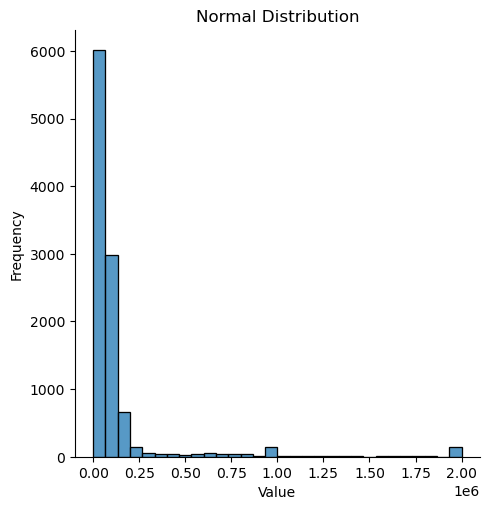

In [6]:
data=df['ConvertedComp']
sns.displot(data, bins=30)  # distribution
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

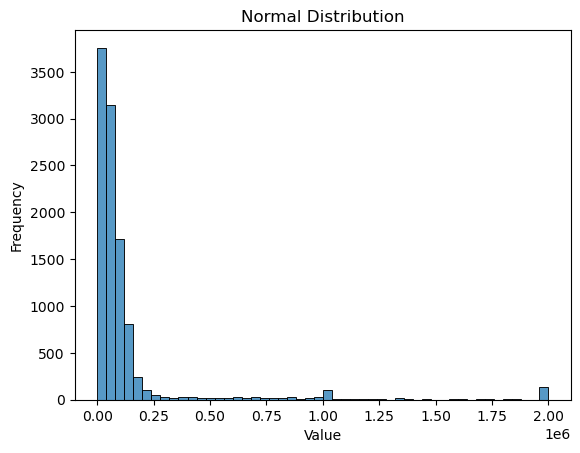

In [7]:
# your code goes here
sns.histplot(data, bins=50)  # Histogram for the distribution
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')


plt.show()

In [8]:
min_val = df['ConvertedComp'].min()
max_val = df['ConvertedComp'].max()
df['A_normalized'] = 2 * (df['ConvertedComp'] - min_val) / (max_val - min_val)

print(df['A_normalized'].mean())

0.13159673161973162


In [50]:
df['A_normalized'].median()

0.057745

In [10]:
man_res=df[df['Gender']=='Man'].groupby('Respondent')

In [11]:
print(len(man_res))

10480


In [12]:
median_converted_comp_women = df[df['Gender'] == 'Woman']['A_normalized'].median()
print(median_converted_comp_women)


0.057708


In [13]:
print(df['Age'].median())

29.0


In [14]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

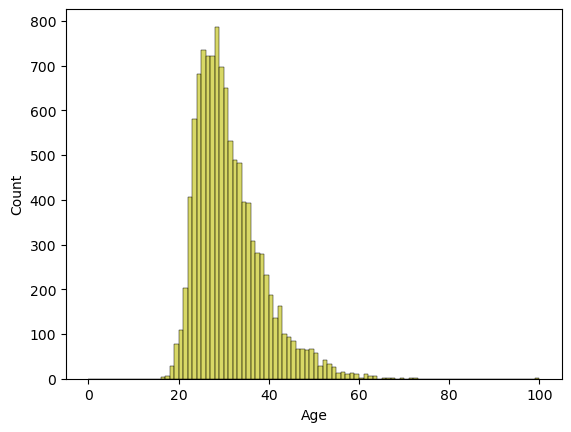

In [35]:
sns.histplot(df['Age'],bins=range(0, 101, 1),alpha=0.6,color='y')
plt.show()

In [16]:
na_normalized=df['A_normalized'].dropna()

<Axes: >

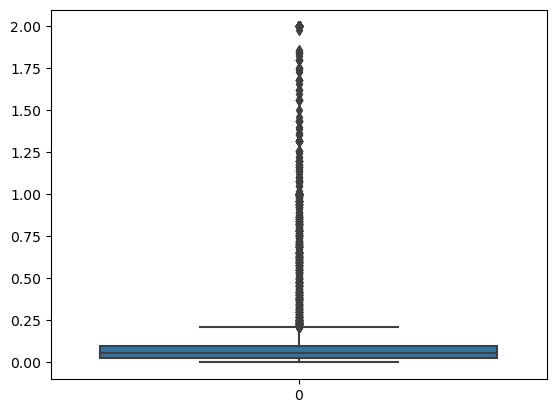

In [17]:
sns.boxplot(data=na_normalized)

In [18]:
na_normalized.describe()

count    10582.000000
mean         0.131597
std          0.294787
min          0.000000
25%          0.026868
50%          0.057745
75%          0.100000
max          2.000000
Name: A_normalized, dtype: float64

In [20]:
# your code goes here
Q1 = na_normalized.quantile(0.25)
Q3 = na_normalized.quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers

# Remove outliers
comp_cleaned_no_outliers = na_normalized[(na_normalized >= lower_bound) & (na_normalized <= upper_bound)]


In [21]:
# your code goes here
df['ConvertedComp']=comp_cleaned_no_outliers

In [48]:
# your code goes here
df['ConvertedComp'].median()

0.052704

In [27]:
# Assuming 'df' is your DataFrame
df['Age'].dtype

dtype('float64')

In [45]:
tot_res = df.groupby('Respondent')['Age'].sum()


In [46]:
tot_res

Respondent
4        22.0
9        23.0
13       28.0
16       26.0
17       29.0
         ... 
25136    36.0
25137    25.0
25138    34.0
25141    25.0
25142    30.0
Name: Age, Length: 11398, dtype: float64

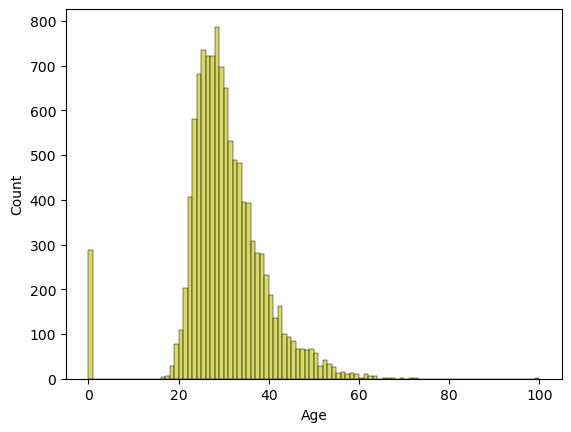

In [47]:
sns.histplot(data=tot_res,bins=range(0, 101, 1),alpha=0.6,color='y')
plt.show()